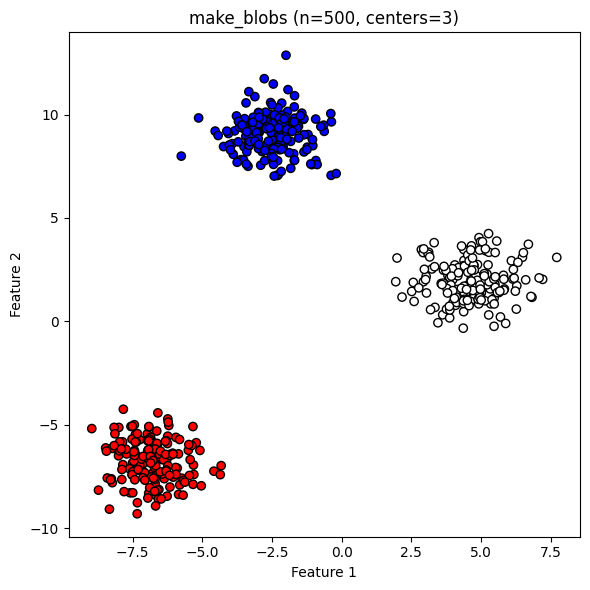

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# 데이터: make_blobs (명확한 군집 구조)
X, y = make_blobs(n_samples=500, centers=3, cluster_std=1.0, random_state=42)

# 시각화
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
plt.title('make_blobs (n=500, centers=3)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.tight_layout()
plt.show()

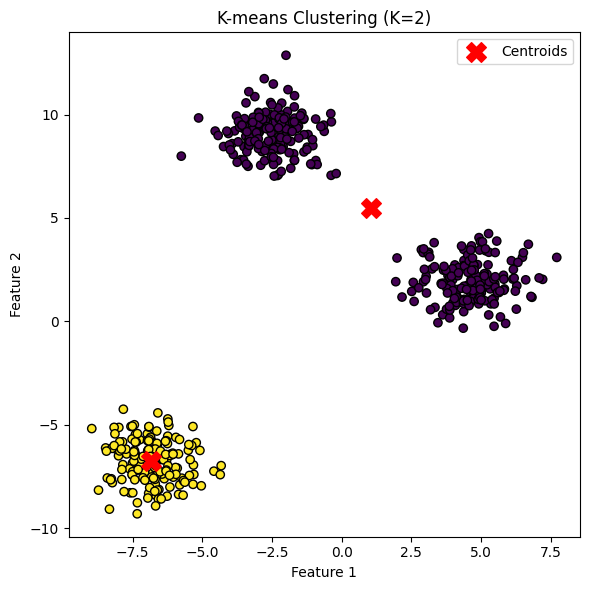

In [2]:
from sklearn.cluster import KMeans

# K-means 클러스터링 (클러스터 수 K=2)
kmeans = KMeans(n_clusters=2, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# 시각화
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')
plt.title('K-means Clustering (K=2)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.tight_layout()
plt.show()

In [3]:
from sklearn.metrics import silhouette_score, adjusted_rand_score

# 실루엣 점수 계산 (클러스터링 품질 평가 지표, 1에 가까울수록 좋음)
silhouette = silhouette_score(X, y_kmeans)


print(f"K-means 성능 평가:")
print(f" - 실루엣 점수 (Silhouette Score): {silhouette:.3f}")
'''
군집 내 응집도와 군집 간 분리도를 함께 고려하는 지표로, 1에 가까울수록 좋습니다.
'''


K-means 성능 평가:
 - 실루엣 점수 (Silhouette Score): 0.703


'\n군집 내 응집도와 군집 간 분리도를 함께 고려하는 지표로, 1에 가까울수록 좋습니다.\n'

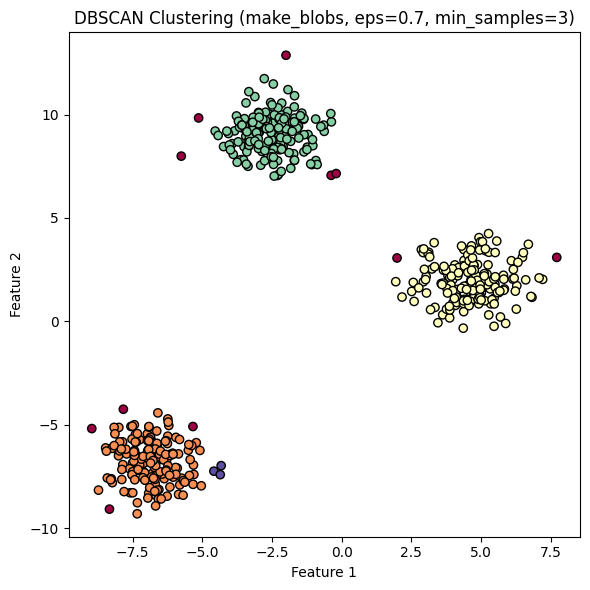

DBSCAN 실루엣 점수 (eps=0.7, min_samples=3): 0.675


In [4]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.7, min_samples=3)
y_dbscan = dbscan.fit_predict(X)

# 시각화
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, cmap='Spectral', edgecolor='k')
plt.title('DBSCAN Clustering (make_blobs, eps=0.7, min_samples=3)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.tight_layout()
plt.show()

# 실루엣 점수 계산 (Noise 제외)
mask = y_dbscan != -1
if len(set(y_dbscan[mask])) > 1:
    silhouette = silhouette_score(X[mask], y_dbscan[mask])
else:
    silhouette = float('nan')

print(f"DBSCAN 실루엣 점수 (eps=0.7, min_samples=3): {silhouette:.3f}")


[[-10.29836074  -7.45980892   5.23586638   1.58737111   2.81784768]]

[1]


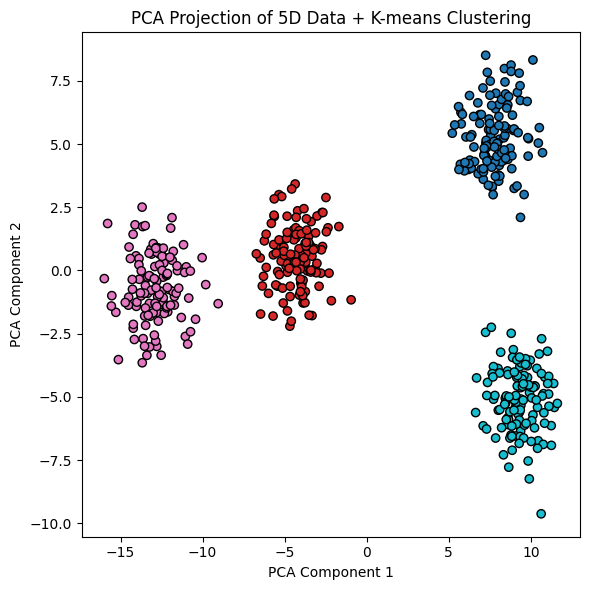

In [5]:
from sklearn.decomposition import PCA

# 5차원 고차원 데이터 생성
X_highdim, y_highdim = make_blobs(n_samples=500, centers=4, n_features=5, cluster_std=1.2, random_state=42)
print(X_highdim[:1])
print()
print(y_highdim[:1])

# PCA로 2차원 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_highdim)

# K-means 클러스터링 (고차원 공간에서 수행)
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X_highdim)

# 시각화
plt.figure(figsize=(6, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='tab10', edgecolor='k')
plt.title('PCA Projection of 5D Data + K-means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


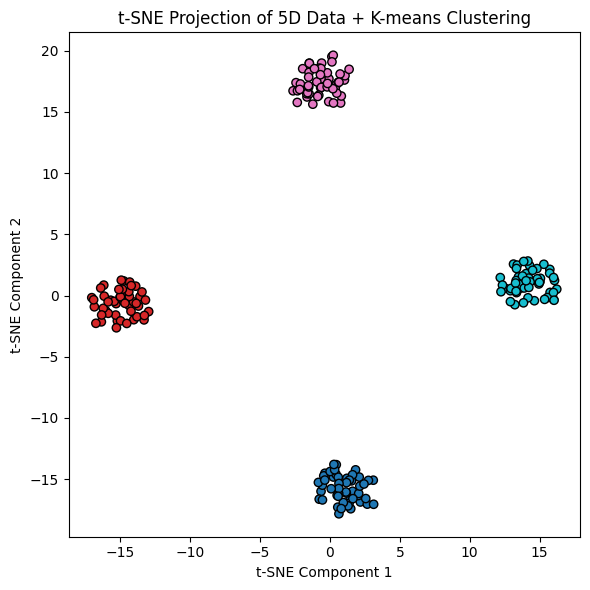

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 5차원 데이터
X_highdim, y_highdim = make_blobs(n_samples=200, centers=4, n_features=5, cluster_std=1.2, random_state=42)

# K-means 군집
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X_highdim)

# t-SNE 임베딩
tsne = TSNE(n_components=2, perplexity=30, n_iter=500, random_state=42)
X_tsne = tsne.fit_transform(X_highdim)

# 시각화
plt.figure(figsize=(6, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_kmeans, cmap='tab10', edgecolor='k')
plt.title('t-SNE Projection of 5D Data + K-means Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.tight_layout()
plt.show()


| 항목      | `digits` (load\_digits) | `MNIST`                      |
| ------- | ----------------------- | ---------------------------- |
| 해상도     | 8×8 (총 64픽셀)            | 28×28 (총 784픽셀)              |
| 샘플 수    | 약 1,800개                | 70,000개                      |
| 픽셀당 정보량 | 낮음 (흐릿함)                | 높음 (더 세밀한 필기체)               |
| 사용성     | 빠르게 테스트 가능              | 정교한 딥러닝에도 적합                 |
| 로딩 방식   | sklearn에 내장             | torchvision / keras로 다운로드 필요 |


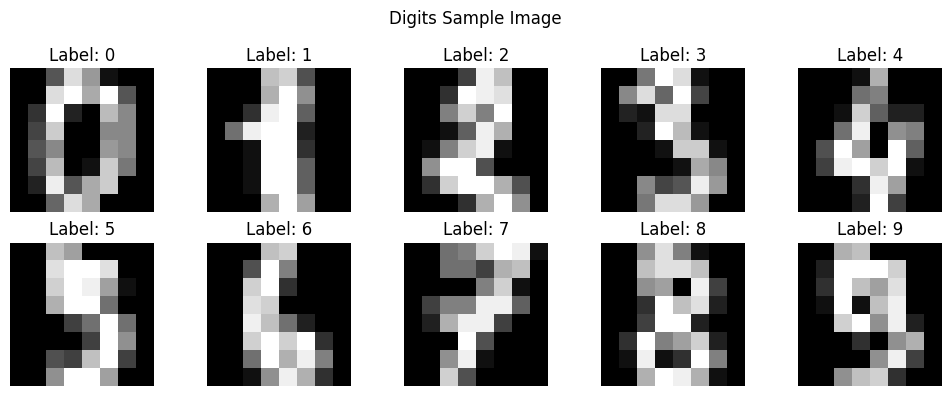

In [ ]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# 데이터 불러오기
digits = load_digits()
images = digits.images  # 이미지 (1797, 8, 8)
labels = digits.target  # 실제 숫자 라벨

# 앞의 10개 숫자 이미지 시각화
plt.figure(figsize=(10, 4))  # 전체 그림 크기 조정
for i in range(10):
    plt.subplot(2, 5, i + 1)  # 2행 5열로 배치
    plt.imshow(images[i], cmap='gray')  # 흑백 이미지로 표시
    plt.title(f"Label: {labels[i]}")
    plt.axis('off')  # 축 제거

plt.suptitle("Digits Sample Image")
plt.tight_layout()
plt.show()


In [ ]:
# 데이터 불러오기
X = digits.data  # (1797, 64), 8x8 이미지가 1D 벡터로 있음
y = digits.target  # 실제 숫자 라벨 (0~9)X
X[0], y[0]


(array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]),
 np.int64(0))

In [ ]:
#스케일링 및 K-means 클러스터링 수행
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 스케일링
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_scaled[0]

array([ 0.        , -0.33501649, -0.04308102,  0.27407152, -0.66447751,
       -0.84412939, -0.40972392, -0.12502292, -0.05907756, -0.62400926,
        0.4829745 ,  0.75962245, -0.05842586,  1.12772113,  0.87958306,
       -0.13043338, -0.04462507,  0.11144272,  0.89588044, -0.86066632,
       -1.14964846,  0.51547187,  1.90596347, -0.11422184, -0.03337973,
        0.48648928,  0.46988512, -1.49990136, -1.61406277,  0.07639777,
        1.54181413, -0.04723238,  0.        ,  0.76465553,  0.05263019,
       -1.44763006, -1.73666443,  0.04361588,  1.43955804,  0.        ,
       -0.06134367,  0.8105536 ,  0.63011714, -1.12245711, -1.06623158,
        0.66096475,  0.81845076, -0.08874162, -0.03543326,  0.74211893,
        1.15065212, -0.86867056,  0.11012973,  0.53761116, -0.75743581,
       -0.20978513, -0.02359646, -0.29908135,  0.08671869,  0.20829258,
       -0.36677122, -1.14664746, -0.5056698 , -0.19600752])

In [ ]:
#2. K-Means 클러스터링 수행
k = 10  # 숫자가 0~9 총 10
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# 클러스터 할당 결과
cluster_labels = kmeans.labels_
cluster_labels

array([5, 9, 9, ..., 9, 7, 7], dtype=int32)

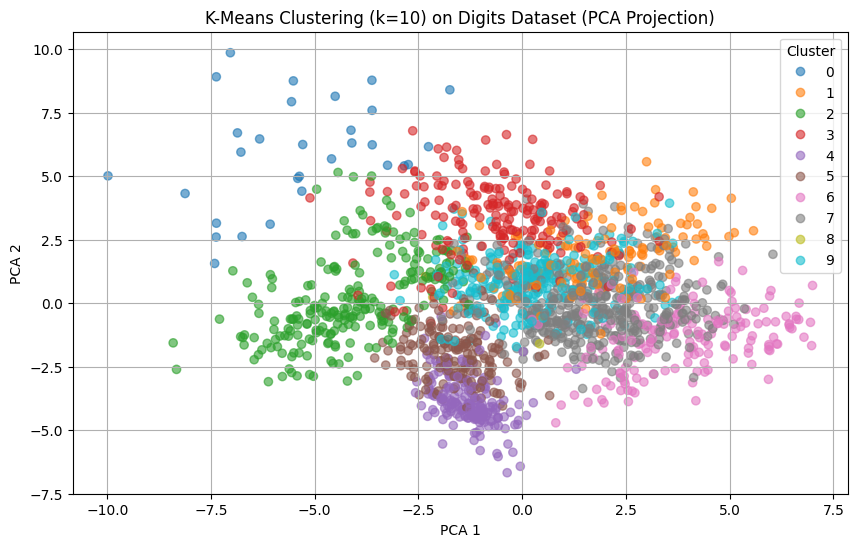

In [ ]:
from sklearn.decomposition import PCA

# PCA로 차원 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 시각화
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='tab10', alpha=0.6)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.title("K-Means Clustering (k=10) on Digits Dataset (PCA Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


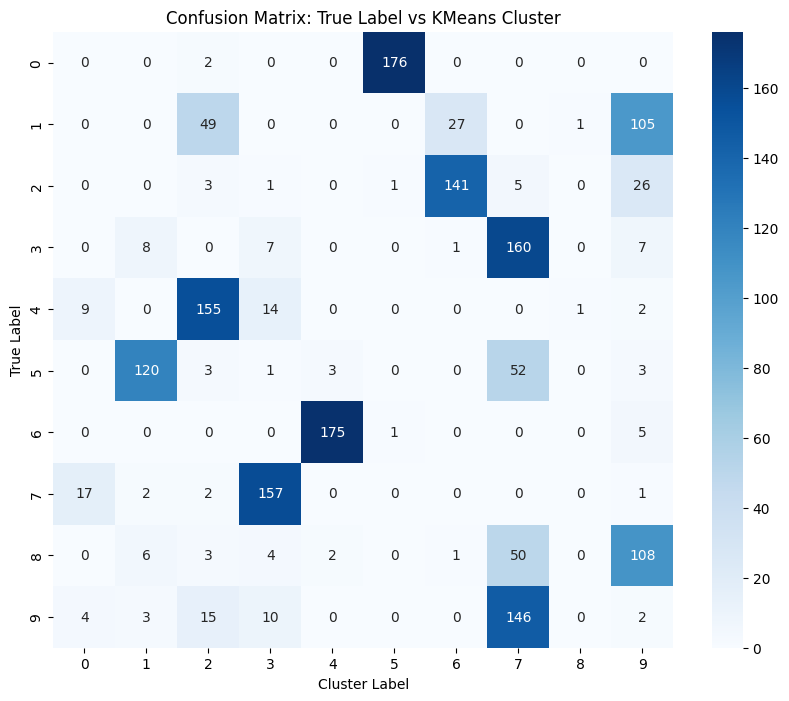

In [ ]:
#실제 숫자 레이블과의 비교(confusion matrix)
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y, cluster_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix: True Label vs KMeans Cluster")
plt.xlabel("Cluster Label")
plt.ylabel("True Label")
plt.show()
